In [1]:
import pickle
import mrcfile
import numpy as np
from matplotlib import pyplot as plt

In [2]:
with mrcfile.open('output/other_map_and_masks/vol_000_fit_molmap_alpha_4068.mrc') as mrc:
    fit_molmap_alpha = mrc.data
with mrcfile.open('output/other_map_and_masks/vol_000_fit_alpha_mask.mrc') as mrc:
    alpha_mask = mrc.data
alpha_masked = fit_molmap_alpha * alpha_mask
alpha_mean = np.mean(alpha_masked[alpha_mask == 1])
print(f"mean intensity for molmap alpha subunit: {alpha_mean}")

mean intensity for molmap alpha subunit: 0.2752377986907959


In [3]:
with mrcfile.open('output/other_map_and_masks/vol_000_fit_TrxA_molmap_4068.mrc') as mrc:
    TrxA_molmap = mrc.data
with mrcfile.open('output/other_map_and_masks/vol_000_fit_TrxA_chain_C_mask.mrc') as mrc:
    TrxA_mask_C = mrc.data
with mrcfile.open('output/other_map_and_masks/vol_000_fit_TrxA_chain_A_mask.mrc') as mrc:
    TrxA_mask_A = mrc.data
TrxA_masked = TrxA_molmap * TrxA_mask_C
TrxA_mean = np.mean(TrxA_masked[TrxA_mask_C == 1])
print(f"mean intensity for molmap TrxA: {TrxA_mean}")

mean intensity for molmap TrxA: 0.25915706157684326


In [4]:
with open('output/vol_to_keep.pkl', 'rb') as f:
    vol_to_keep = pickle.load(f)

In [5]:
TrxA_C_occu = []
TrxA_A_occu= []

for idx in vol_to_keep:
    with mrcfile.open(f'../kmeans1000/vol_{str(idx).zfill(3)}.mrc', permissive=True) as mrc:
        vol = mrc.data
    vol_alpha = (vol * alpha_mask)[alpha_mask == 1]
    vol_TrxA_C = (vol * TrxA_mask_C)[TrxA_mask_C == 1]
    vol_TrxA_A = (vol * TrxA_mask_A)[TrxA_mask_A == 1]
    TrxA_C_occu.append(np.mean(vol_TrxA_C) * alpha_mean / np.mean(vol_alpha) / TrxA_mean)
    TrxA_A_occu.append(np.mean(vol_TrxA_A) * alpha_mean / np.mean(vol_alpha) / TrxA_mean)

/home/dx63/mambaforge/envs/RNR_landscape/lib/python3.9/site-packages/mrcfile/mrcinterpreter.py:216: RuntimeWarning: Unrecognised machine stamp: 0x00 0x00 0x00 0x00
  warnings.warn(str(err), RuntimeWarning)


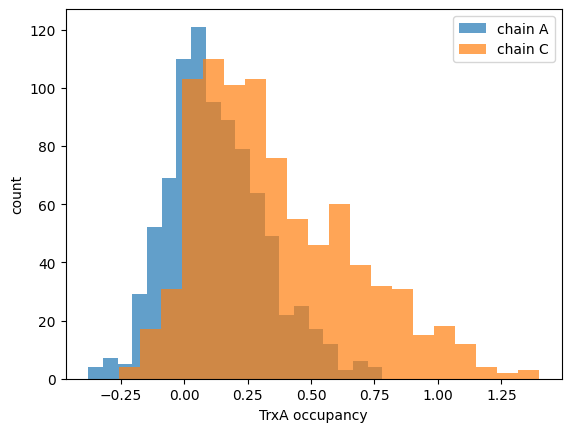

In [6]:
plt.hist(TrxA_A_occu,20, alpha=0.7, label='chain A')
plt.hist(TrxA_C_occu,20, alpha=0.7, label='chain C')
plt.xlabel('TrxA occupancy')
plt.ylabel('count')
plt.legend()
plt.show()

In [7]:
with open('output/turnover_TrxA_A_occu.pkl', 'wb') as f:
    pickle.dump(TrxA_A_occu,f)

In [8]:
with open('output/turnover_TrxA_C_occu.pkl', 'wb') as f:
    pickle.dump(TrxA_C_occu,f)